In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
def train(dataset,percent,lr):
    random_choice = np.random.choice(samples,int(round(samples*percent)),replace=False) # Choose random % of data
    train_set = dataset[random_choice,:]
    steps = 0
    pos = 0
    correct = 0 # Format data into features and labels
    x = train_set[:,:-1]
    x = np.concatenate([x,np.ones((x.shape[0],1))],axis=1) # Add a column of 1s to account for bias
    t = train_set[:,-1]
    weights = np.random.uniform(-1,1,size)
    while correct != len(x): # Loop through all 87 samples
        sum = np.dot(x[pos],weights) # Calculate the sum of the inputs multiplied by weights
        if sum >= 0 and t[pos] != 'GOOD': # Decrease weights if prediction is 1 and actual is 0
            weights = weights + (-lr*x[pos])
            correct = 0
        elif sum < 0 and t[pos] != 'POOR': # Increase weights if prediction is 0 and actual is 1
            weights = weights + (lr*x[pos])
            correct = 0
        else: # Prediction and actual match
            correct += 1
        pos += 1
        steps += 1
        if pos > len(x)-1:
            pos = 0
    return([weights,steps,percent,lr])

In [3]:
data = pd.read_csv("HW2_data.csv")
data = data.to_numpy()
size = data.shape[1]
samples = data.shape[0]

x = data[:,:-1]
x = np.hstack((x,np.ones((x.shape[0],1))))
t = data[:,-1]

def test(dataset,percent,lr,show=False):
    output = train(dataset,percent,lr) # Calculate weights
    results = np.dot(x,output[0]) # Use weights on the entire dataset
    actual = t == 'GOOD'
    predict = results >= 0
    accuracy = np.mean(actual == predict) # Compare labels to calculate percent that match
    print("Using %i%% of data and lr = %f" % (output[2]*100,output[3]))
    print("Took %i iterations" % output[1])
    print("Accuracy = %f" % accuracy)
    if show:
        print("Weights:")
        print(output[0])
    
test(data,0.5,0.01,True)

Using 50% of data and lr = 0.010000
Took 575 iterations
Accuracy = 0.850575
Weights:
[-0.3363995579140516 0.10836118593131479 0.671656214622423
 -0.30463079821273054 0.9286564048866235 0.052592581437920866
 -0.02176462371057364 -0.35582173233847125 -0.44556985458609577
 -0.6309886348859307 1.023689694538212 0.03257185986726739
 -0.20908567282802715 -0.7484753510950262 0.5534943546138026
 -0.9603406296965487 0.5820903027950612 0.5762187944841024
 0.35303365622362026 0.7831766809904901 -0.2365158070335827
 0.5869665696266928 -0.17670848403306205 -0.5158548601129006
 -0.23225533390667927 -0.05355245405420785 -0.5256750804355391
 0.9420642488350229 -0.17819262814565276 0.1827458511168286
 0.5446855801000119]


For the results above, even when only 50% of the data is used for training, accuracy is in the range of 80-90%. Furthermore, it is clear the the weights can have both different signs and different magnitudes. This suggests expression of a particular gene can indicate a more positive or negative prognosis, and some are more or less influential in the final determination.

In [4]:
accs = []
avgs = []
for i in range(1,11): # Loop through all possibilities from 10% to 100%
    repeats = []
    for j in range(1,101): # Repeat calculation for each possibility 100 times
        output = train(data,i/10,0.01)
        results = np.dot(x,output[0])
        actual = t == 'GOOD'
        predict = results >= 0
        accuracy = np.mean(actual == predict)
        repeats.append(accuracy)
    accs.append(repeats) # Create a list of all weight values
    avgs.append(statistics.mean(repeats)) # Create a list of average weights across all 100 trials
print("Accuracy:")
for avg in avgs:
    print(avg)
print("\nVariance:")
for acc in accs:
    variance = round(np.var(acc),4) # Calculate variance
    print(variance)

Accuracy:
0.643448275862069
0.7297701149425287
0.7911494252873563
0.8383908045977011
0.8863218390804598
0.9201149425287356
0.9416091954022988
0.9627586206896551
0.9818390804597701
1.0

Variance:
0.0075
0.0033
0.0031
0.0019
0.0011
0.0009
0.0008
0.0004
0.0002
0.0


Single run


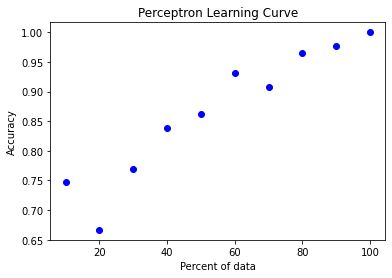

100 runs


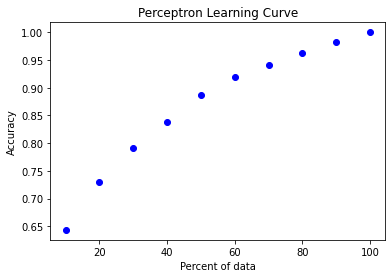

In [11]:
single = []
for i in range(1,11): # Loop through all possibilities from 10% to 100%
    output = train(data,i/10,0.01)
    results = np.dot(x,output[0])
    actual = t == 'GOOD'
    predict = results >= 0
    accuracy = np.mean(actual == predict)
    single.append(accuracy)
plt.plot(range(10,110,10),single,'bo')
plt.title("Perceptron Learning Curve")
plt.xlabel("Percent of data")
plt.ylabel("Accuracy");
print("Single run")
plt.show()

plt.plot(range(10,110,10),avgs,'bo')
plt.title("Perceptron Learning Curve")
plt.xlabel("Percent of data")
plt.ylabel("Accuracy");
print("100 runs")
plt.show()

Unsurprisingly, the closer the training set resembles the test set, the higher the accuracy. Also across multiple trials, the variance in the model's predictions decreases. In a more practical situation, this would be a clear example of overfitting, and something such as cross-validation should be used.

In [6]:
test(data,0.8,0.001)
test(data,0.8,0.01)
test(data,0.8,0.1)
test(data,0.8,1)
test(data,0.8,10)

Using 80% of data and lr = 0.001000
Took 20596 iterations
Accuracy = 0.954023
Using 80% of data and lr = 0.010000
Took 1071 iterations
Accuracy = 0.965517
Using 80% of data and lr = 0.100000
Took 459 iterations
Accuracy = 0.988506
Using 80% of data and lr = 1.000000
Took 404 iterations
Accuracy = 0.988506
Using 80% of data and lr = 10.000000
Took 447 iterations
Accuracy = 1.000000


When the learning rate is adjusted while keeping the other parameters constant, accuracy also remains relatively constant. However, the number of iterations decreases as learning rate decreases, but this only true up to a point, as seen with the range from 0.1 to 10. This shows that a given model should be run multiple times to determine an optimal value.